In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
import seaborn as sns

In [2]:
df = pd.read_csv('HR_comma_sep.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


<Axes: xlabel='salary'>

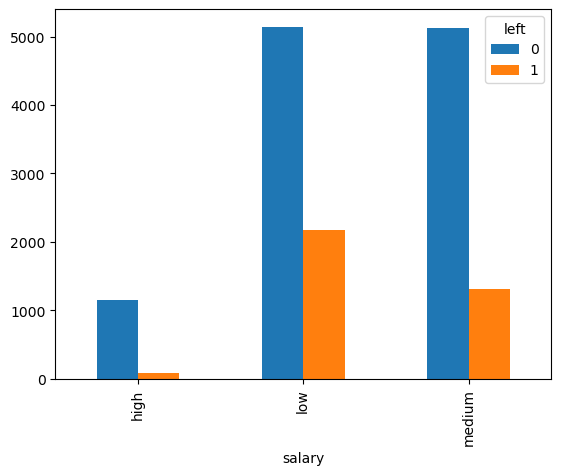

In [6]:
pd.crosstab(df.salary, df.left).plot(kind='bar')

left       0     1
salary            
high    1155    82
low     5144  2172
medium  5129  1317
salary
high      1237
low       7316
medium    6446
dtype: int64


<Axes: xlabel='salary'>

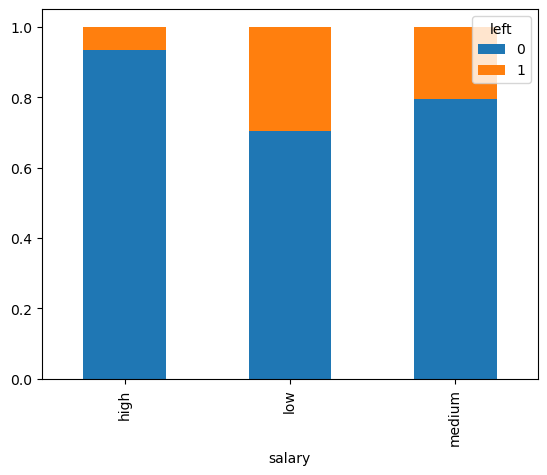

In [7]:
q = pd.crosstab(df.salary, df.left)
print(q)
print(q.sum(1))
q.div(q.sum(1), axis=0).plot(kind='bar', stacked=True)

<Axes: xlabel='satisfaction_level', ylabel='Count'>

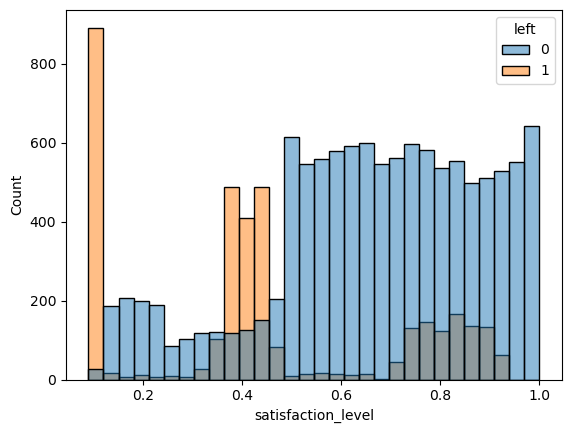

In [12]:
sns.histplot(data=df, x='satisfaction_level', hue='left')

In [5]:
df['sales'].value_counts()

sales
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64

In [13]:
df['salary'].value_counts()

salary
low       7316
medium    6446
high      1237
Name: count, dtype: int64

In [15]:
model = LogisticRegression()
y, X = dmatrices('left~satisfaction_level+last_evaluation+number_project+average_montly_hours+time_spend_company+Work_accident+promotion_last_5years+C(sales)+C(salary)', df, return_type='dataframe')
X = X.rename(columns={
    'C(sales)[T.RandD]': 'Department: Random',
    'C(sales)[T.accounting]': 'Department: Accounting',
    'C(sales)[T.hr]': 'Department: HR',
    'C(sales)[T.management]': 'Department: Management',
    'C(sales)[T.marketing]': 'Department: Marketing',
    'C(sales)[T.product_mng]': 'Department: Product_Management',
    'C(sales)[T.sales]': 'Department: Sales',
    'C(sales)[T.support]': 'Department: Support',
    'C(sales)[T.technical]': 'Department: Technical',
    'C(salary)[T.low]': 'Salary: Low',
    'C(salary)[T.medium]': 'Salary: Medium',
    'C(salary)[T.high]': 'Salary: High',
})
y = np.ravel(y)         # convert y from a dataframe to a 1-D numpy array

In [16]:
model.fit(X, y)

/home/yawen/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
coeff = pd.DataFrame(list(zip(X.columns, np.transpose(model.coef_))))
coeff.rename(columns={0: 'Features', 1: 'Coefficients'}, inplace=True)
coeff

,Features,Coefficients
0,Intercept,[-0.38043045088630284]
1,Department: Random,[-0.43955634833881346]
2,Department: Accounting,[0.12108057172495756]
3,Department: HR,[0.3597221483666608]
4,Department: Management,[-0.5348263596870125]
5,Department: Marketing,[0.06808662219079019]
6,Department: Product_Management,[-0.033687830091060925]
7,Department: Sales,[-0.002840645663013263]
8,Department: Support,[0.1888353575366762]
9,Department: Technical,[0.19599667329497172]


In [27]:
print(model.score(X, y))

0.7947196479765317


In [28]:
model.predict_proba([[1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,0.5, 0.7, 4.0, 160, 3.0, 0, 0]])

/home/yawen/miniconda3/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.87091656, 0.12908344]])

In [29]:
model.predict([[1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,0.5, 0.7, 4.0, 160, 3.0, 0, 0]])

/home/yawen/miniconda3/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0.])

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model2 = LogisticRegression(C=10000)
model2.fit(X_train, y_train)
pred = model2.predict(X_test)
metrics.accuracy_score(y_test, pred)

/home/yawen/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8013333333333333

In [31]:
metrics.confusion_matrix(y_test, pred)

array([[3194,  268],
       [ 626,  412]])

As you can see in the confusion matrix, most positive samples are correctly predicted, however, most negative samples are incorrectly predicted. 

In [32]:
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.84      0.92      0.88      3462
         1.0       0.61      0.40      0.48      1038

    accuracy                           0.80      4500
   macro avg       0.72      0.66      0.68      4500
weighted avg       0.78      0.80      0.79      4500



In [ ]:
import statsmodel.api as sm

df = pd.read_csv('logit_train1.csv', index_col=0)

X_train = df[['gmat', 'gpa', 'work_experience']]
y_train = df[['admitted']]

In [37]:
import statsmodels.api as sm
log_reg = sm.Logit(y, X).fit()

Optimization terminated successfully.
         Current function value: 0.428358
         Iterations 7


In [38]:
log_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                14999
Model:                          Logit   Df Residuals:                    14980
Method:                           MLE   Df Model:                           18
Date:                Thu, 28 Aug 2025   Pseudo R-squ.:                  0.2195
Time:                        15:01:32   Log-Likelihood:                -6424.9
converged:                       True   LL-Null:                       -8232.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         -1.6570      0.189     -8.784      0.000      -2.027      -1.287
Department: Random                -0.4016      0.136     -2.962      0.003      -0.667      -0.136
Department: Accounting             0.1807      0.122      1.480      0.139      -0.059       0.420
Department: HR                     0.4131      0.121      3.415      0.001       0.176       0.650
Department: Management            -0.2677      0.152     -1.765      0.078      -0.565       0.030
Department: Marketing              0.1686      0.122      1.386      0.166      -0.070       0.407
Department: Product_Management     0.0275      0.120      0.230      0.818      -0.207       0.262
Department: Sales                  0.1419      0.089      1.601      0.109      -0.032       0.316
Department: Support                0.2307      0.097      2.391      0.017       0.042       0.420
Department: Technical              0.2509      0.093      2.685      0.007       0.068       0.434
Salary: Low                        1.9441      0.129     15.111      0.000       1.692       2.196
Salary: Medium                     1.4132      0.129     10.924      0.000       1.160       1.667
satisfaction_level                -4.1357      0.098    -42.177      0.000      -4.328      -3.944
last_evaluation                    0.7309      0.149      4.899      0.000       0.439       1.023
number_project                    -0.3151      0.021    -14.775      0.000      -0.357      -0.273
average_montly_hours               0.0045      0.001      8.643      0.000       0.003       0.005
time_spend_company                 0.2678      0.016     17.192      0.000       0.237       0.298
Work_accident                     -1.5298      0.090    -17.083      0.000      -1.705      -1.354
promotion_last_5years             -1.4301      0.258     -5.552      0.000      -1.935      -0.925
==================================================================================================
"""